#Analysis of Gaussian IL-PAH investigation

This document is intended to outline and discuss the outcome of the pygauss API that I have buit on top of the chemlab package to analyse output from Gaussian. In particular, for the analysis of Ionic-Liquids and Graphenic structures.

In [1]:
import pygauss.molecule as pg
%matplotlib inline
from IPython.display import display
import os; home = os.path.expanduser("~")
file_path = os.path.join(home, 'Dropbox', 'Mres_Project', 
                         'gaussian', 'for_analysis')

:0: FutureWarning: IPython widgets are experimental and may change in the future.


##IL Cation Analysis

The basic function of the API is to take in data files ouput from Gaussian for a particular system and analyse their outcome in terms of:
- Geometry alignment, and
- Electronic distribution

In [2]:
cation = pg.Molecule(file_path, 
                    init_fname='CJS1_emim_-_init.com', 
                    opt_fname='CJS1_emim_-_6-311+g-d-p-_gd3bj_opt_.log',
                    freq_fname='CJS1_emim_-_6-311+g-d-p-_gd3bj_freq_.log',
                    nbo_fname='CJS1_emim_-_6-311+g-d-p-_gd3bj_pop-nbo-full-_.log')

Initial analysis can be made of the computed optimisation, confirming that it was successful, that it is a saddle point within the potential energy surface and its energy (basis set dependant).

Basis Set: 6-311+G(d,p) (5D, 7F) (242 functions)
Optimised: True
Conformer: True
Energy: -904916.954653


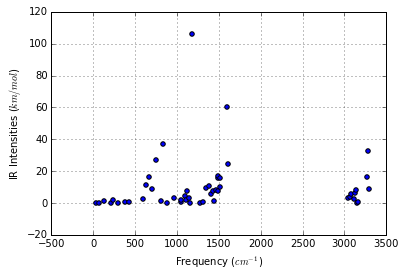

In [3]:
print 'Basis Set: {0} ({1} functions)'.format(cation.get_basis_descript(), cation.get_basis_funcs())
print 'Optimised:', cation.is_optimised()
print 'Conformer:', cation.is_conformer()
print 'Energy:', cation.get_optimisation_E(units='kJmol-1')
cation.plot_IRfreqs()
#cation.plot_optimisation_E(units='kJmol-1')

An initial qualitative analysis of the geometry can be made.

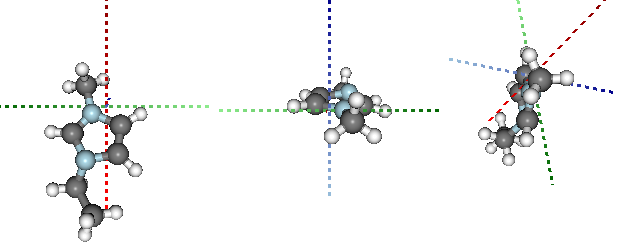

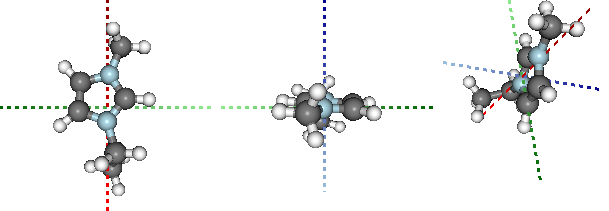

In [4]:
display(cation.show_initial(ball_stick=True, zoom=2,
                    rotations=[[0, 0, 90], [90, 90, 0], [225, 45, 45]], axis_length=0.5))
display(cation.show_optimisation(ball_stick=True, zoom=2,
                    rotations=[[0, 0, 90], [90, 90, 0], [225, 45, 45]], axis_length=0.5))

As can be seen above, the geometry is generally aligned arbitrarily to the standard axes. Therefore, an algorithm has been included to align the geometry to a plane defined by three atoms. This allows geometry to be more easily compared and will also come in helpful later for calculating relative orientations. 

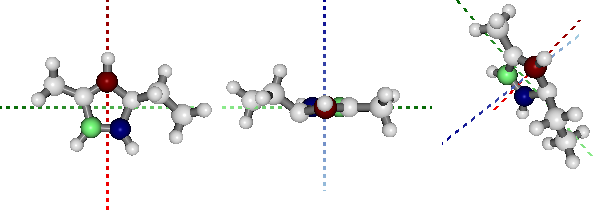

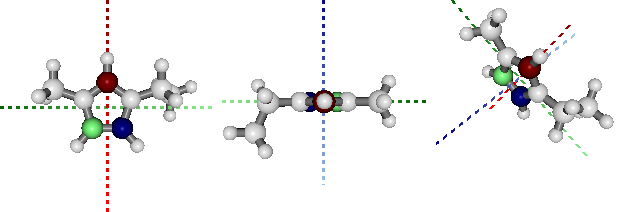

In [5]:
cation.add_alignment_atoms(3, 2, 1)
display(cation.show_highlight_atoms([[3], [2], [1]], optimised=False, ball_stick=True, zoom=2,
                            rotations=[[0, 0, 90], [90, 90, 0], [5, 55, 45]], axis_length=0.5))
display(cation.show_highlight_atoms([[3], [2], [1]], optimised=True, ball_stick=True, zoom=2,
                            rotations=[[0, 0, 90], [90, 90, 0], [5, 55, 45]], axis_length=0.5))

For $C_nC_1imidazolium$ based cations, a key variable in its geometric orientation is the $C_n$ chains angle relative to the $imidazolium$ ring.

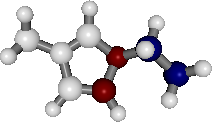

In [6]:
cation.show_highlight_atoms([[1, 4], [9, 10]], optimised=False, 
                            ball_stick=True, zoom=4, rotations=[[0, 0, 90]])

This can be computed as below:

In [7]:
print 'Initial chain angle:', cation.calc_dihedral_angle([1,4,9,10], optimisation=False)
print 'Optimised chain angle:', cation.calc_dihedral_angle([1,4,9,10], optimisation=True)

Initial chain angle: 62.214421533
Optimised chain angle: 72.0708184902


Another measure which can be visaulised is the relative atomic charge, as calculated from Natural Bond Orbital (NBO) analysis. 

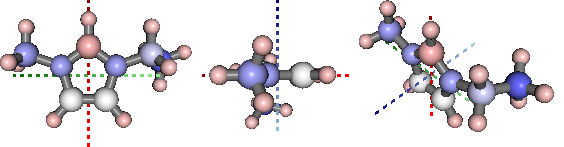

In [8]:
cation.show_nbo_charges(ball_stick=True, zoom=4, rotations=[[0, 0, 90], [90, 180, 0], [45, 45, 90]], 
                        minval=-1, maxval=1, axis_length=0.3)

By taking either the positive or negatively charged atoms, we can weight their coordinates by charge and then calculate a mean *charge center* to give a simplistic metric of charge distribution. This is given in polar coordinates, relative to the ring plane.

In [9]:
print 'Positive charge center; r = {0} nm, theta = {1}, phi = {2}'.format(
            *cation.calc_nbo_charge_center(3, 2, 1, atoms=range(1, 20)))

Positive charge center; r = 0.0195556655293 nm, theta = -44.0178676457, phi = -30.9951213782


##IL Cation-Anion Pair Analysis

Three anions will be assessed, with each $C_nC_1imidazolium$, simplistically representing three different geometries;
- a point ($Cl$),
- a ball ($BF_4$),
- and a ball and chain ($EtSO_4$).

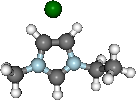

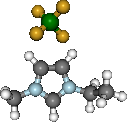

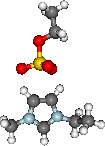

In [10]:
display(pg.Molecule(file_path, 'CJS1_emim-cl_B_init.com').show_initial(ball_stick=True))
display(pg.Molecule(file_path, 'CJS1_emim-bf_B_init.com').show_initial(ball_stick=True))
display(pg.Molecule(file_path, 'CJS1_emim-etso_B_init.com').show_initial(ball_stick=True))

The minimum distance of the ions can be calculated as an initial metric.

In [11]:
il_pair = pg.Molecule(file_path, 
            init_fname='CJS1_emim-cl_T_init.com', 
            opt_fname='CJS1_emim-cl_T_6-311+g-d-p-_gd3bj_opt-modredundant_unfrz.log',
            freq_fname='CJS1_emim-cl_T_6-311+g-d-p-_gd3bj_freq_unfrz.log',
            nbo_fname='CJS1_emim-cl_T_6-311+g-d-p-_gd3bj_pop-nbo-full-_unfrz.log',
            alignto=[3, 2, 1])

In [12]:
print 'Minimum cation-anion distance: ', il_pair.calc_min_dist(
                                            range(1, 20), [20]), 'nm'

Minimum cation-anion distance:  0.261845163097 nm


The position of the anion about the cation can also be calculated, in polar coordintes relative to the cation ring. 

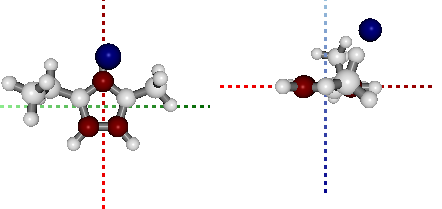

In [13]:
il_pair.show_highlight_atoms([[3, 2, 1], [20]], ball_stick=True, 
                             rotations=[[180, 0, 90], [270, 0, 0]], zoom=2 , axis_length=0.5)

In [14]:
print 'Anion position; r = {0} nm, theta = {1}, phi = {2}'.format(
            *il_pair.calc_polar_coords_to_plane(3, 2, 1, 20))

Anion position; r = 0.324996165021 nm, theta = 4.91889733257, phi = -51.6647210077


We can also use **Second Order Perturbation Theory** analysis to identify potential regions of charge transfer
(LP = Lone Pair, BD* = Anti-Bonding).

[['LP', [8], 'BD*', [1, 2], 30.74], ['LP', [8], 'BD*', [3, 4], 75.25], ['LP', [20], 'BD*', [3, 4], 22.28]]


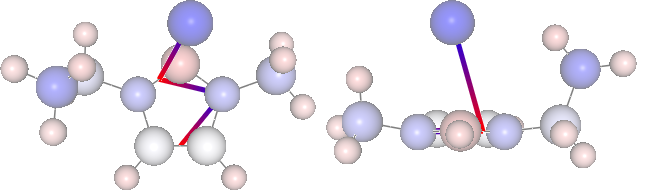

In [15]:
print il_pair.calc_SOPT_bonds(min_energy=20.)
il_pair.show_SOPT_bonds(min_energy=20., rotations=[[180, 0, 90], [270, 90, 0]], width=700)

###Conformer Analysis

In [16]:
import pygauss.analysis as ag
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
import os; home = os.path.expanduser("~")
file_path = os.path.join(home, 'Dropbox', 'Mres_Project', 
                         'gaussian', 'for_analysis')

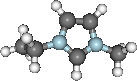

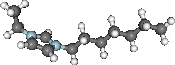

In [17]:
analysis = ag.Analysis(file_path)
analysis.add_run({'Cation':'emim'},
                init_fname='CJS1_emim_-_init.com', 
                opt_fname='CJS1_emim_-_6-311+g-d-p-_gd3bj_opt_.log',
                freq_fname='CJS1_emim_-_6-311+g-d-p-_gd3bj_freq_.log',
                nbo_fname='CJS1_emim_-_6-311+g-d-p-_gd3bj_pop-nbo-full-_.log')
analysis.add_run({'Cation':'omim'},
                init_fname='CJS1_omim_-_init.com', 
                opt_fname='CJS1_omim_-_6-311+g-d-p-_gd3bj_opt-modredundant_unfrz.log',
                freq_fname='CJS1_omim_-_6-311+g-d-p-_gd3bj_freq_unfrz.log',
                nbo_fname='CJS1_omim_-_6-311+g-d-p-_gd3bj_pop-nbo-full-_unfrz.log')
for mol in analysis.yield_mol_images(): display(mol)

In [18]:
df, errors = analysis.add_runs(headers=['Cation', 'Anion', 'Initial', 'Stage'], 
            values=[['omim', 'emim'], ['cl', 'bf', 'etso'],
            ['B', 'BE', 'BM', 'F', 'FE', 'FM', 'T'], ['final']],
            init_pattern='CJS1_{0}-{1}_{2}_init.com',
            opt_pattern='CJS1_{0}-{1}_{2}_6-311+g-d-p-_gd3bj_opt-modredundant_unfrz.log',
            freq_pattern='CJS1_{0}-{1}_{2}_6-311+g-d-p-_gd3bj_freq_unfrz.log',
            nbo_pattern='CJS1_{0}-{1}_{2}_6-311+g-d-p-_gd3bj_pop-nbo-full-_unfrz.log',
            ipython_print=True)
print 'Read Errors:', errors

Read Errors: [{'Cation': 'omim', 'Initial': 'FM', 'Anion': 'etso', 'Stage': 'final'}, {'Cation': 'emim', 'Initial': 'B', 'Anion': 'etso', 'Stage': 'final'}]


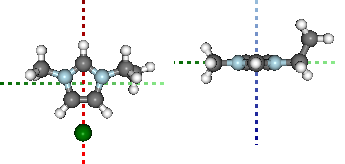

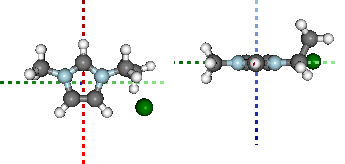

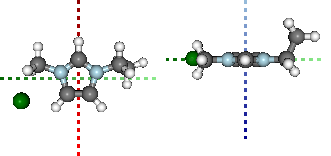

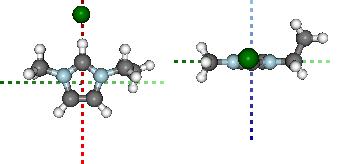

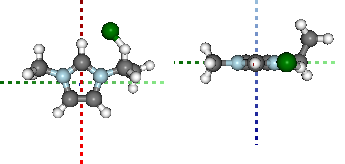

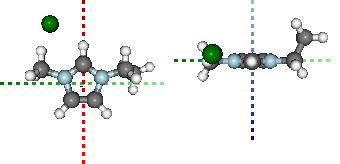

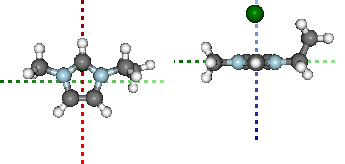

In [19]:
mols = analysis.yield_mol_images(mtype='initial', 
                                      filters={'Cation':'emim', 'Anion':'cl'}, 
                                      align_to=[3,2,1], 
                                      rotations=[[0, 0, 90], [-90, 90, 0]],
                                      axis_length=0.5)
for mol in mols: display(mol)

In [20]:
analysis.add_basic_properties()
analysis.remove_non_conformers()

,Anion,Cation,Initial,Molecule,Stage,Basis,Nbasis,Optimised,Conformer
1,NaN,omim,NaN,<PyGauss Molecule>,NaN,"6-311+G(d,p) (5D, 7F)",446,True,False
4,cl,omim,BM,<PyGauss Molecule>,final,"6-311+G(d,p) (5D, 7F)",476,True,False
11,bf,omim,BM,<PyGauss Molecule>,final,"6-311+G(d,p) (5D, 7F)",556,True,False
18,etso,omim,BM,<PyGauss Molecule>,final,"6-311+G(d,p) (5D, 7F)",638,True,False
19,etso,omim,F,<PyGauss Molecule>,final,"6-311+G(d,p) (5D, 7F)",638,True,False
20,etso,omim,FE,<PyGauss Molecule>,final,"6-311+G(d,p) (5D, 7F)",638,True,False
31,bf,emim,BM,<PyGauss Molecule>,final,"6-311+G(d,p) (5D, 7F)",352,True,False
40,etso,emim,FM,<PyGauss Molecule>,final,"6-311+G(d,p) (5D, 7F)",434,False,False


In [21]:
analysis.add_mol_property('Energy (au)', 'get_optimisation_E', units='hartree')
analysis.get_table(head=5)

,Anion,Cation,Initial,Stage,Basis,Nbasis,Optimised,Conformer,Energy (au)
0,NaN,emim,NaN,NaN,"6-311+G(d,p) (5D, 7F)",242,True,True,-344.665
2,cl,omim,B,final,"6-311+G(d,p) (5D, 7F)",476,True,True,-1041.082
3,cl,omim,BE,final,"6-311+G(d,p) (5D, 7F)",476,True,True,-1041.082
5,cl,omim,F,final,"6-311+G(d,p) (5D, 7F)",476,True,True,-1041.094
6,cl,omim,FE,final,"6-311+G(d,p) (5D, 7F)",476,True,True,-1041.094


In [22]:
def add_subset_properties(filters, diatoms, cation, anion, anion_pivot):
    analysis.add_mol_property_subset('Cation chain, $\\psi$', 'calc_dihedral_angle', 
                                     filters=filters, args=[diatoms])
    analysis.add_mol_property_subset(['Charge center, $r$', 'Charge center, $\\theta$', 'Charge center, $\\phi$'], 
                                   'calc_nbo_charge_center', filters=filters,
                                     args=[3, 2, 1], kwargs={'atoms':cation})
    analysis.add_mol_property_subset(['Anion-cation, $r$', 'Anion-cation, $\\theta$', 'Anion-cation, $\\phi$'], 
                                   'calc_polar_coords_to_plane', filters=filters,
                                     args=[3, 2, 1, anion_pivot])
    analysis.add_mol_property_subset('Anion-cation, $d_{min}$', 'calc_min_dist', 
                                     filters=filters, args=[cation, anion])    
    
add_subset_properties({'Cation':'emim'}, [1, 4, 9, 10], range(1, 20), range(20, 33), 20)
add_subset_properties({'Cation':'omim','Anion':'cl'}, [1, 4, 9, 17], range(1, 16)+range(17, 39), [16], 16)
add_subset_properties({'Cation':'omim','Anion':'bf'}, [1, 4, 9, 21], range(1, 16)+range(22, 43), range(16, 22), 16)
add_subset_properties({'Cation':'omim','Anion':'etso'}, [1, 4, 9, 28], range(1, 16)+range(28, 50), range(16, 28), 16)

In [23]:
analysis.get_table(columns=[0,1,2]+range(8,17), filters={'Initial':'T'})

,Anion,Cation,Initial,Energy (au),"Cation chain, $\psi$","Charge center, $r$","Charge center, $\theta$","Charge center, $\phi$","Anion-cation, $r$","Anion-cation, $\theta$","Anion-cation, $\phi$","Anion-cation, $d_{min}$"
8,cl,omim,T,-1041.095,64.331,0.090,-72.846,-66.305,0.328,5.062,-51.311,0.261
15,bf,omim,T,-1005.465,64.839,0.090,-71.395,-65.089,0.388,0.279,-39.338,0.109
21,etso,omim,T,-1359.283,58.329,0.088,-63.814,-64.244,0.374,0.321,-48.269,0.216
28,cl,emim,T,-805.119,64.375,0.021,-38.254,-38.690,0.325,4.919,-51.665,0.262
35,bf,emim,T,-769.489,62.687,0.022,-37.264,-35.646,0.386,-0.324,-39.775,0.219
41,etso,emim,T,-1123.305,52.178,0.021,-41.450,-39.006,0.369,9.762,-49.206,0.222


RadViz is a way of visualizing multi-variate data. It is based on a simple spring tension minimization algorithm. Basically you set up a bunch of points in a plane. In our case they are equally spaced on a unit circle. Each point represents a single attribute. You then pretend that each sample in the data set is attached to each of these points by a spring, the stiffness of which is proportional to the numerical value of that attribute (they are normalized to unit interval). The point in the plane, where our sample settles to (where the forces acting on our sample are at an equilibrium) is where a dot representing our sample will be drawn. Depending on which class that sample belongs it will be colored differently.

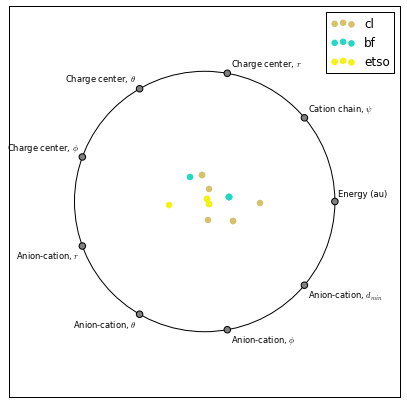

In [24]:
analysis.plot_radviz_comparison('Anion', columns=range(8, 17), 
                                filters={'Cation':'emim', 'Anion':['cl', 'bf', 'etso']})
plt.gcf().set_size_inches(7,7)

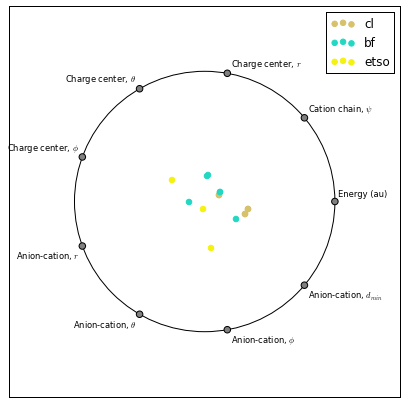

In [25]:
analysis.plot_radviz_comparison('Anion', columns=range(8, 17), 
                                filters={'Cation':'omim', 'Anion':['cl', 'bf', 'etso']})
plt.gcf().set_size_inches(7,7)

The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. This algorithm requires the number of clusters to be specified. It has been used across a large range of application areas in many different fields.

In [26]:
kwargs = {'mtype':'optimised', 'align_to':[3,2,1], 
            'rotations':[[0, 0, 90], [-90, 90, 0]],
            'axis_length':0.5}
def show_groups(df):
    for cat, gf in df.groupby('Category'):
        print 'Category {0}:'.format(cat)
        mols = analysis.yield_mol_images(rows=gf.index.tolist(), **kwargs)
        for mol, row in zip(mols, gf.index.tolist()): 
            print '(row {0})'.format(row)
            display(mol)

Category 0:
(row 22)


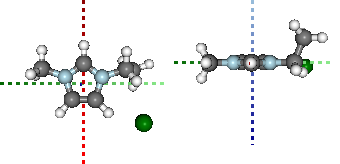

(row 23)


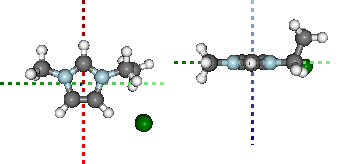

Category 1:
(row 28)


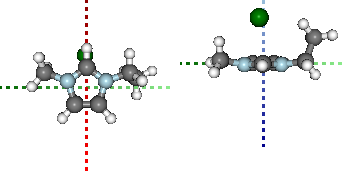

Category 2:
(row 24)


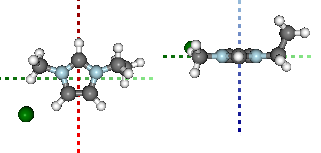

Category 3:
(row 25)


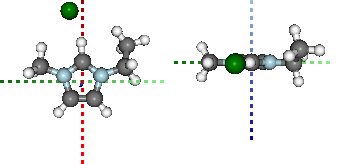

(row 27)


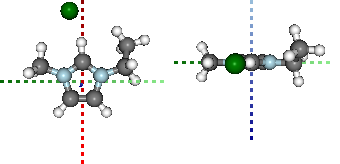

Category 4:
(row 26)


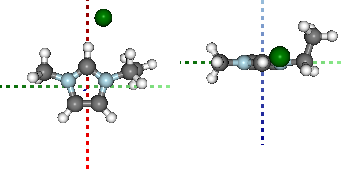

In [27]:
show_groups(analysis.calc_kmean_groups('Anion', 'cl', 5, columns=range(8, 17), 
                                filters={'Cation':'emim'}))

Category 0:
(row 30)


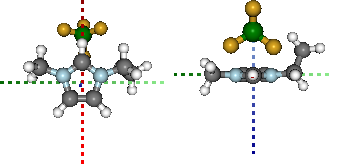

(row 32)


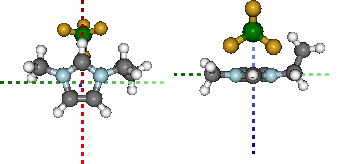

(row 33)


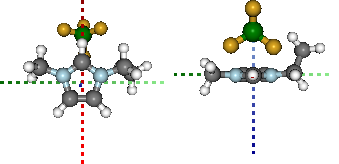

(row 34)


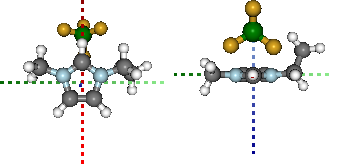

(row 35)


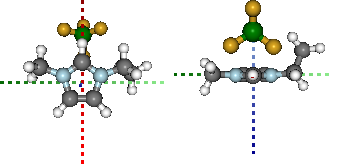

Category 1:
(row 29)


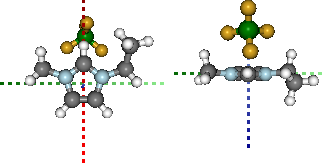

In [28]:
show_groups(analysis.calc_kmean_groups('Anion', 'bf', 2, columns=range(8, 17), 
                                filters={'Cation':'emim'}))                              

Category 0:
(row 37)


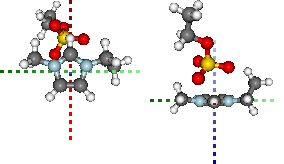

(row 38)


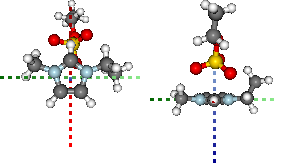

(row 39)


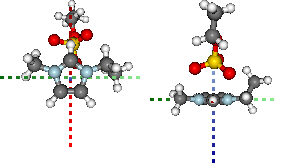

(row 41)


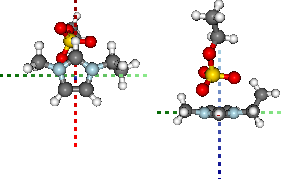

Category 1:
(row 36)


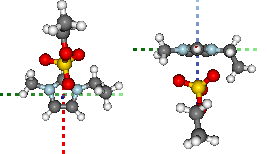

In [29]:
show_groups(analysis.calc_kmean_groups('Anion', 'etso', 2, columns=range(8, 17), 
                                filters={'Cation':'emim'}))

Category 0:
(row 16)


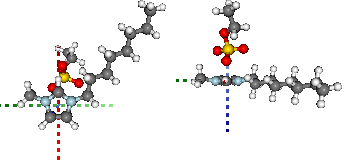

Category 1:
(row 17)


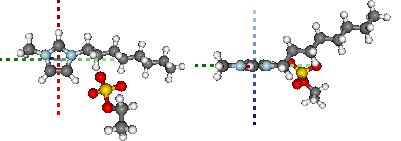

Category 2:
(row 21)


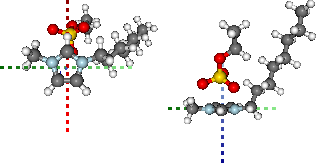

In [30]:
show_groups(analysis.calc_kmean_groups('Anion', 'etso', 3, columns=range(8, 17), 
                                filters={'Cation':'omim'}))